# podstawowe definicje

In [1]:
def show2imgs(im1, im2, title1='Obraz pierwszy', title2='Obraz drugi', size=(10,10)):
    
    import matplotlib.pyplot as plt
    
    f, (ax1, ax2) = plt.subplots(1,2, figsize=size)
    ax1.imshow(im1, cmap='gray')
    ax1.axis('off')
    ax1.set_title(title1)

    ax2.imshow(im2, cmap='gray')
    ax2.axis('off')
    ax2.set_title(title2)
    plt.show()

In [2]:
# SEGMENTACJA PRZEZ ROZROST OBSZARU
def howMany(im):# liczymy ilosc obiektow
    g = set() # g jako zbior ilosci obiektow
    l , p = im.shape[0] , im.shape[1] # lecimy po wierszach i kolumnach
    for i in range(1,l - 1):
        for j in range(1,p - 1):
            if im[i][j] != 255:  # jesli nie jest tłem to dodaje 
                g.add(im[i][j]) # wszystkie warosci 
                
    return len(g) # zwraca nie powtarazajace sie wartosci

In [3]:
def isIn(i,j,image): # flaga sprawdzajaca 
    return i >= 0 and i < image.shape[0] and j >=0 and j < image.shape[1]# zwracamy bollean

def bfs(i,j,image,color):
    q = [(i,j)] # q jest zbiorem jednoelementowym z krotka miejsca 
    while q:# czy nie jest to zbior pusty
        ii,jj = q.pop(0) # remove and return last value
        for dx in range(-1,2): # od -1 do 1 wlacznie (sprawdza maske 3x3)
            for dy in range(-1,2):# od -1 do 1 wlacznie (sprawdza maske 3x3)
                if dx == 0 and dy == 0: # to nasz element wiemy ze nalezy dlatego go nie spr
                    continue
                a = ii + dx # wartosc dodana do funji zwieksza o (-1,0,1)
                b = jj + dy
                if isIn(a,b,image) and image[a][b] == 0:#dla konkretnego piksela jeli nalezy do obiektu czyli ==0 to przypis inna wart
                    image[a][b] = color
                    q.append((a,b)) # dodjae do zbioru 


def searchObjects(image):
    cnt = 10
    for i in range(image.shape[0]):# lecimy 
        for j in range(image.shape[1]):
            v = image[i][j] # przypisujemy wartosc
            if v == 0:   # jesli wart=0 czyli jesli jest rozny od tla
                image[i][j] = cnt # przypisujemy new wartsoc
                bfs(i,j,image,cnt) # lecimy do innej funkjci  przekazujemy 1 piksel bfs(i,j-miejsce ,obrazek.)
                cnt += 90  # lecimy dalej ale kolejnem obrazkowi przypiszemy o 90 jesnosci wiecej aby sie  wyroznial
    return image # zwracamy zmieniony obraz

# start

In [4]:
from skimage.color import convert_colorspace, rgb2lab, rgb2hsv, rgb2gray
import cv2
from skimage import io, color, img_as_ubyte, util
from skimage import data
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from skimage.color import rgb2gray
from skimage import exposure, filters



url = 'images/nowy02.png'
p = io.imread(url)
#pokazuje pierwszy kolorowy rgb obraz
plt.figure(figsize=(5,5))
plt.imshow(p, cmap="gray")
plt.axis('off')
plt.show()
#koniec pokazania


p = color.rgb2gray(p)
print(p[5,5])
#pokazuje w odcieniach szrosci obraz
plt.figure(figsize=(5,5))
plt.imshow(p, cmap="gray")
plt.axis('off')
plt.show()
#koniec pokazan





p = img_as_ubyte(p) #mamy reprezentacje 0-255 zamiast float (0,1)
print(p[5,5])



nbins = 100

histogram = exposure.histogram(p, nbins=nbins)
hist, cbins = histogram

plt.plot(cbins, hist)
plt.xlim([-10, 266])
plt.grid()
plt.show()




#detekcja krawedzi
print('detekcja_krawedzi_Canny')
th = 150
th, blena = cv2.threshold(p, thresh=th, maxval=255, type=cv2.THRESH_OTSU)

clena = cv2.Canny(blena, threshold1=200, threshold2=250, apertureSize = 5, L2gradient = False)

show2imgs(p, clena, title1='Obraz oryginalny', title2='Obraz po detekcji krawędzi', size=(20,20))






#BINARYZACJA
print('binaryzacja')




from skimage import data
import cv2

im = p

th = 1
th, bim = cv2.threshold(im, thresh=th, maxval=255, type=cv2.THRESH_BINARY_INV)

show2imgs(im, bim, title1='Obraz oryginalny', title2='Obraz po binaryzacji', size=(10,10))




#teraz erozja

print(bim[0,0])
print('rozdzielenie sklejonych obiektow')
bim = util.invert(bim)# obraz obracamy


#chcemy erozją rozdzielic obiekty
import cv2

kernel = np.ones((3,3),np.uint8)
erodeBin = cv2.erode(bim, kernel=kernel, iterations=20)

show2imgs(bim, erodeBin, title1='Obraz oryginalny', title2='Obraz po erozji', size=(10,10))



#mamy obraz po erozji name erodeBin

print(erodeBin[0,8])
erodeBin = util.invert(erodeBin)
print(erodeBin[0,8])



<Figure size 500x500 with 1 Axes>

0.0


<Figure size 500x500 with 1 Axes>

0


<Figure size 640x480 with 1 Axes>

detekcja_krawedzi_Canny


<Figure size 2000x2000 with 2 Axes>

binaryzacja


<Figure size 1000x1000 with 2 Axes>

255
rozdzielenie sklejonych obiektow


<Figure size 1000x1000 with 2 Axes>

0
255


# ilosc pikseli w porcentach po erozji

In [5]:

if(erodeBin[0,7]==255):
    erodeBin = util.invert(erodeBin)
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(erodeBin)

def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)
a=0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))#dlugosc dla kazdego obiektu na obrazie
    a=a+len(pts)
    if(i==(nb_labels-1)):
        print('ilosc pikseli obiektow na obrazie')
        print(a)
        print('\n')
        
        
erodeBin = util.invert(erodeBin)
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(erodeBin)


print(nb_labels)
b=0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))#dlugosc dla kazdego obiektu na obrazie
    b=b+len(pts)
    if(i==(nb_labels-1)):
        print('ilosc pikseli tla na obrazie')
        print(b)
        
        
        
print('procentowy stosunek pikseli obiektow do tla wynosi')
c=(a/b)*100
print(c ,'%')

51
236
236
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
187
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
195
195
195
ilosc pikseli obiektow na obrazie
10962


1
737582
ilosc pikseli tla na obrazie
737582
procentowy stosunek pikseli obiektow do tla wynosi
1.4862076352188638 %


# ilosc pikseli w porcentach przed erozji

In [6]:

if(bim[0,7]==255):
    bim = util.invert(bim)
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(bim)

def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)
a=0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))#dlugosc dla kazdego obiektu na obrazie
    a=a+len(pts)
    if(i==(nb_labels-1)):
        print('ilosc pikseli obiektow na obrazie')
        print(a)
        print('\n')
        
        
bim = util.invert(erodeBin)
from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(bim)


print(nb_labels)
b=0
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))#dlugosc dla kazdego obiektu na obrazie
    b=b+len(pts)
    if(i==(nb_labels-1)):
        print('ilosc pikseli tla na obrazie')
        print(b)
        
        
        
print('procentowy stosunek pikseli obiektow do tla wynosi')
c=(a/b)*100
print(c ,'%')

30
16182
3844
15584
8130
3844
3844
3844
24103
3844
3844
7652
5
1
3
23255
3920
1
12110
7652
7652
3844
12175
3844
3844
3844
7808
4081
3844
3844
3844
ilosc pikseli obiektow na obrazie
200286


51
236
236
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
187
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
195
195
195
ilosc pikseli tla na obrazie
10962
procentowy stosunek pikseli obiektow do tla wynosi
1827.0935960591132 %


# indeksacja( kolorowanie) obrazu i wyznaczanie wartosci liczbowych

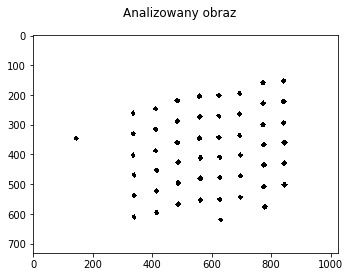

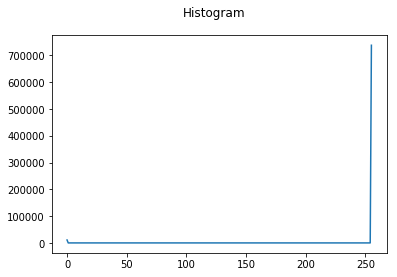

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.color import rgb2gray

from skimage import io, color, img_as_ubyte, util

path = './images/'

image = erodeBin
if(bim[0,7]==0):
    bim = util.invert(bim)
    
plt.imshow(image, cmap='gray')
plt.axis('on')
plt.suptitle('Analizowany obraz')
plt.show()

bins=np.arange(0, 257)
histo = np.histogram(image, bins=bins)

hist, bins = histo

plt.plot(bins[:-1], hist)
plt.suptitle('Histogram')
plt.show()

image = util.invert(image)
binary=image

tworzymy obraz typu label


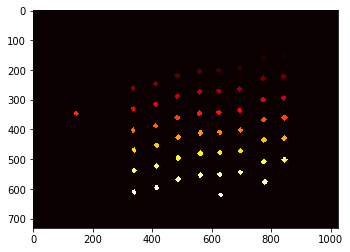

In [8]:
print('tworzymy obraz typu label')

from scipy import ndimage as ndi
label_objects, nb_labels = ndi.label(binary)

sizes = np.bincount(label_objects.ravel())
mask_sizes = sizes > 20
mask_sizes[0] = 0
plt.imshow(label_objects, cmap="hot")
figures = mask_sizes[label_objects]

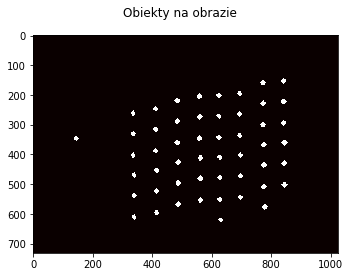

(731, 1024)
(731, 1024)
51


In [9]:
plt.imshow(figures, cmap="hot")
plt.axis('on')
plt.suptitle('Obiekty na obrazie')
plt.show()

print(figures.shape)
print(label_objects.shape)
print(nb_labels)

In [10]:
no_of_object = 4

def cog(labelledImage, objNumber):
    cx = 0
    cy = 0
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                cy = cy + y
                cx = cx + x

    cx = cx / sizes[objNumber]
    cy = cy / sizes[objNumber]

    return int(cy), int(cx)

cogs = []
for i in range(nb_labels):
    cogs.append(cog(label_objects,i+1))

print(cogs)

[(153, 840), (159, 771), (195, 692), (201, 623), (204, 558), (219, 483), (222, 840), (228, 771), (246, 410), (261, 335), (264, 692), (270, 623), (273, 558), (288, 483), (294, 840), (300, 771), (315, 410), (330, 335), (336, 692), (342, 623), (345, 558), (345, 143), (360, 483), (360, 843), (366, 774), (387, 410), (402, 335), (402, 695), (408, 626), (411, 561), (426, 486), (429, 843), (435, 774), (453, 413), (468, 338), (471, 695), (477, 626), (480, 561), (495, 486), (501, 843), (507, 774), (522, 413), (537, 338), (543, 695), (549, 626), (552, 561), (567, 486), (576, 777), (594, 413), (609, 338), (618, 629)]


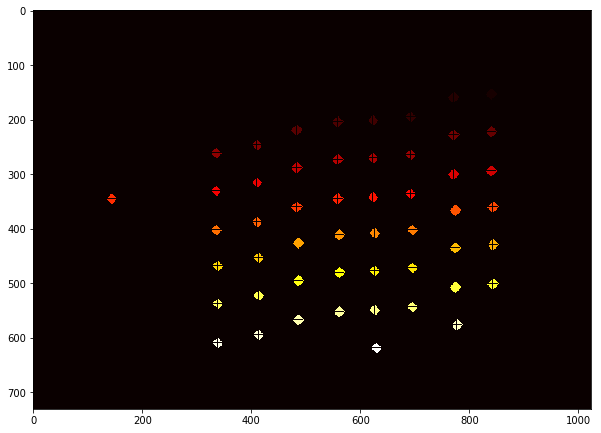

In [11]:

def drawMarkers(image, coords):
    image = np.copy(image)
    for item in coords:
        y,x = item
        for j in range(y-10,y+10):
            image[j,x] = 0
        for i in range(x-10,x+10):
            image[y,i] = 0
    return image


lo = drawMarkers(label_objects, cogs)

plt.figure(figsize=(10,10))
plt.imshow(lo,cmap='hot')
plt.show()

In [12]:
print('ilosc elementow na obrazie')
def getFigure(labelledImage, objNumber):
    
    points = []
    for y in range(labelledImage.shape[0]):
        for x in range(labelledImage.shape[1]):
            if labelledImage[y,x] == objNumber:
                points.append((y,x))

    return points

print(nb_labels)

ilosc elementow na obrazie
51


In [13]:
import math

In [14]:
print('ilosc pikseli nalezacych do poszczegolenych obiektow')
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    print(len(pts))

ilosc pikseli nalezacych do poszczegolenych obiektow
236
236
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
187
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
236
195
195
195
195
236
236
236
195
195
195


In [15]:
print('liczba punktow i srodek ciezkosci')
def cog2(points):
    mx=0
    my=0
    for (y,x) in points:
        mx = mx + x
        my = my + y
    mx = mx/len(points)
    my = my/len(points)
    
    return [my, mx]


for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    
    print('Liczba punktow: ',len(pts),' Srodek ciezkosci: ', cog2(pts))

liczba punktow i srodek ciezkosci
Liczba punktow:  236  Srodek ciezkosci:  [153.52542372881356, 840.8050847457627]
Liczba punktow:  236  Srodek ciezkosci:  [159.52542372881356, 771.8050847457627]
Liczba punktow:  195  Srodek ciezkosci:  [195.84615384615384, 692.9435897435898]
Liczba punktow:  195  Srodek ciezkosci:  [201.84615384615384, 623.9435897435898]
Liczba punktow:  236  Srodek ciezkosci:  [204.52542372881356, 558.8050847457627]
Liczba punktow:  236  Srodek ciezkosci:  [219.52542372881356, 483.8050847457627]
Liczba punktow:  236  Srodek ciezkosci:  [222.52542372881356, 840.8050847457627]
Liczba punktow:  236  Srodek ciezkosci:  [228.52542372881356, 771.8050847457627]
Liczba punktow:  195  Srodek ciezkosci:  [246.84615384615384, 410.94358974358977]
Liczba punktow:  195  Srodek ciezkosci:  [261.84615384615387, 335.94358974358977]
Liczba punktow:  195  Srodek ciezkosci:  [264.84615384615387, 692.9435897435898]
Liczba punktow:  195  Srodek ciezkosci:  [270.84615384615387, 623.9435897

In [16]:
from scipy.spatial import distance

def computeBB(points):
    
    s = len(points)
    my,mx = cog2(pts)
    
    r = 0
    for point in points:
         r = r + distance.euclidean(point,(my,mx))**2
            
    return s/(math.sqrt(2*math.pi*r))

In [17]:
for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    
    print('Liczba punktow: ',len(pts), ' Srodek ciezkosci: ', cog2(pts), ' Blair-Bliss: ', bb)

Liczba punktow:  236  Srodek ciezkosci:  [153.52542372881356, 840.8050847457627]  Blair-Bliss:  0.9865370190774349
Liczba punktow:  236  Srodek ciezkosci:  [159.52542372881356, 771.8050847457627]  Blair-Bliss:  0.9865370190774349
Liczba punktow:  195  Srodek ciezkosci:  [195.84615384615384, 692.9435897435898]  Blair-Bliss:  0.9851442762269074
Liczba punktow:  195  Srodek ciezkosci:  [201.84615384615384, 623.9435897435898]  Blair-Bliss:  0.9851442762269074
Liczba punktow:  236  Srodek ciezkosci:  [204.52542372881356, 558.8050847457627]  Blair-Bliss:  0.9865370190774349
Liczba punktow:  236  Srodek ciezkosci:  [219.52542372881356, 483.8050847457627]  Blair-Bliss:  0.9865370190774346
Liczba punktow:  236  Srodek ciezkosci:  [222.52542372881356, 840.8050847457627]  Blair-Bliss:  0.9865370190774349
Liczba punktow:  236  Srodek ciezkosci:  [228.52542372881356, 771.8050847457627]  Blair-Bliss:  0.9865370190774349
Liczba punktow:  195  Srodek ciezkosci:  [246.84615384615384, 410.94358974358977

In [18]:
def computeFeret(points):
    
    px = [x for (y,x) in points]
    py = [y for (y,x) in points]
    
    fx = max(px) - min(px)
    fy = max(py) - min(py)
    
    return float(fy)/float(fx)    

In [19]:
print('wartosci Blair-Bliss oraz Feret dla poszczegolnych elementow')


for i in range(nb_labels):
    pts = getFigure(label_objects, i+1)
    bb = computeBB(pts)
    feret = computeFeret(pts)
    
    print('Liczba punktow: ',len(pts),'\nSrodek ciezkosci: ', cog2(pts),'\nBlair-Bliss: ', bb,'\nFeret: ',feret, '\n---\n')

wartosci Blair-Bliss oraz Feret dla poszczegolnych elementow
Liczba punktow:  236 
Srodek ciezkosci:  [153.52542372881356, 840.8050847457627] 
Blair-Bliss:  0.9865370190774349 
Feret:  0.95 
---

Liczba punktow:  236 
Srodek ciezkosci:  [159.52542372881356, 771.8050847457627] 
Blair-Bliss:  0.9865370190774349 
Feret:  0.95 
---

Liczba punktow:  195 
Srodek ciezkosci:  [195.84615384615384, 692.9435897435898] 
Blair-Bliss:  0.9851442762269074 
Feret:  1.0 
---

Liczba punktow:  195 
Srodek ciezkosci:  [201.84615384615384, 623.9435897435898] 
Blair-Bliss:  0.9851442762269074 
Feret:  1.0 
---

Liczba punktow:  236 
Srodek ciezkosci:  [204.52542372881356, 558.8050847457627] 
Blair-Bliss:  0.9865370190774349 
Feret:  0.95 
---

Liczba punktow:  236 
Srodek ciezkosci:  [219.52542372881356, 483.8050847457627] 
Blair-Bliss:  0.9865370190774346 
Feret:  0.95 
---

Liczba punktow:  236 
Srodek ciezkosci:  [222.52542372881356, 840.8050847457627] 
Blair-Bliss:  0.9865370190774349 
Feret:  0.95 
-

wyswietlenie poszczegolnego obiektu


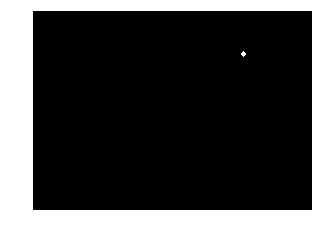

In [20]:
print('wyswietlenie poszczegolnego obiektu')
i = 1
pts = getFigure(label_objects, i+1)
obj = np.zeros(image.shape, dtype='uint8')

for coords in pts:
    obj[coords] = 1

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(5,5))
plt.imshow(obj, cmap="gray")
plt.axis('off')
plt.show()



Biblioteki i funkcje użyte w projekcie z komentarzem.

scikit-image,
scipy.ndimage 
opencv
matplotlib.pyplot

show2imgs()-wyświetla obrazy
imshow()-wyswietla obraz
axis()-zarządza krawędziami
set_title()-dodaje tytul
howMany()-funkcja własna:zadanie-zliczanie
add()-dodaje
isIn()- funkcja własna zwraca true Or false
bfs()-własna segmentacja ,indeksacja obrazu
searchObjects()-wlasna szuka obiektow 
skimage.color 
skimage
numpy
matplotlib.pyplot
warnings
io.read()-czyta obraz
rgb2gray()-konwertuje obraz rgb do odcieni szarosci
color()
img_as_ubyte()-mamy reprezentacje 0-255 zamiast float (0,1)
util.invert()mozemy odwracac wartosci obrazu 0 na 255 i 255 na 0
exposure.histogram()-tworzy histogram z obrazu np wieloodcieniowego
filters()
cv2.threshold()
cv2.Canny()umozliwia dektekcje krawedzi

cv2.erode()-przeprowadza erozje 
scipy
ndimage()
getFigure()-wlasna pobiera obraz zwraca ilość punktow obiektu na obrazie
range()-idzie po elementach podanych (iteruje)
len()zwraca ciag obiektow(int)
plt.suptitle()-tytul pisze nad obrazkiem
cog()-zwraca srodki ciężkości obiektow
drawMarkers()-rysuje obraz wraz z elementami ciężkości
cog2()-zwraca srodek ciężkości
scipy.spatial
computeBB()-wlasna zwraca wartość Blair-Bliss
computeFeret()-zwraca wartości Fereta
